<a href="https://colab.research.google.com/github/Tee-Sarun/DADS6003_K-MEAN/blob/main/Week14-kmeans/K-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

In [1]:
%matplotlib inline
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.cm as cm
import seaborn as sns; sns.set()  # for plot styling

nc = 2 #nc=k

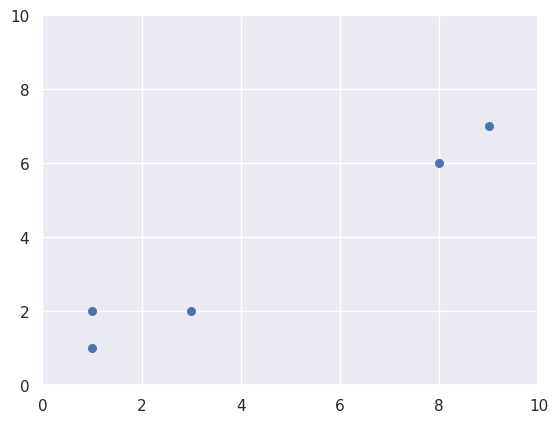

In [2]:

#X = np.array([[1, 2], [2, 1], [3, 3],
#              [8, 1.5], [9, 2], [10, 0]])

X = np.array([[1,1],[1,2],[3,2],[8,6],[9,7]])

plt.scatter(X[:, 0], X[:, 1], s=30)
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

In [3]:
kmeans = KMeans(n_clusters=nc, random_state=123)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=123)

[1 1 1 0 0]
[[8.5        6.5       ]
 [1.66666667 1.66666667]]


(0.0, 10.0)

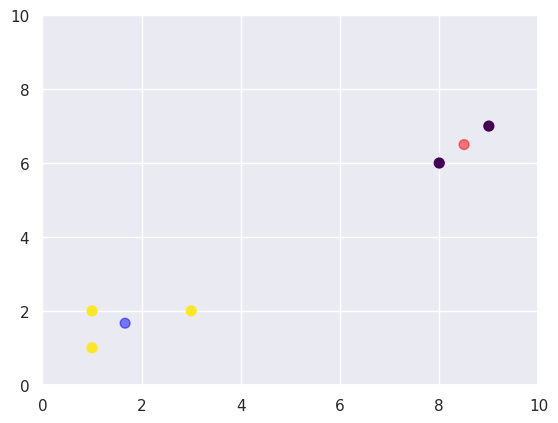

In [4]:
y_kmeans = kmeans.predict(X)
print(y_kmeans)
# get centroids
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c=['red','blue'], s=50, alpha=0.5);
plt.xlim(0,10)
plt.ylim(0,10)


# K-Mean from scratch

## Elbow pseudo code
```python
     list inertia = [ ]
      for k=2...N-1:
        km = kmeans(k)
         inertia.append(km.inertia_)
      plot inertia list VS k
```

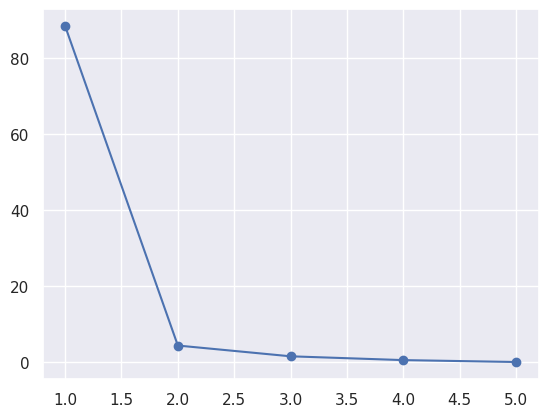

In [5]:
range_n_clusters = [1, 2, 3, 4,5] # 1<clusters< m
inertiaList = []
for k in range_n_clusters:
    cluster = KMeans(n_clusters=k, random_state=10)
    cluster.fit(X)
    inertiaList.append(cluster.inertia_)

#print(inertiaList)
#sns.set_style("whitegrid")
plt.plot(range_n_clusters,inertiaList)
plt.scatter(range_n_clusters, inertiaList)



# silhouette analysis

In [6]:
range_n_clusters = [2, 3, 4]
for k in range_n_clusters:
  clusterer = KMeans(n_clusters=k, random_state=10)
  cluster_labels = clusterer.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(
      "For n_clusters =",
      k,
      "The average silhouette_score is :",
      silhouette_avg,
  )

For n_clusters = 2 The average silhouette_score is : 0.8033785613391377
For n_clusters = 3 The average silhouette_score is : 0.5301703720530624
For n_clusters = 4 The average silhouette_score is : 0.21055728090000841


In [21]:
new_range = range(2,len(range_n_clusters)-1)
for n_clusters in new_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

a= [4 1 0 2 3]
i= [4 1]
centroids= [[9 7]
 [1 2]]
labels =  [1 1 1 0 0]
new_centroids =  [[8.5        6.5       ]
 [1.66666667 1.66666667]]
labels =  [1 1 1 0 0]
new_centroids =  [[8.5        6.5       ]
 [1.66666667 1.66666667]]
centroids =  [[8.5        6.5       ]
 [1.66666667 1.66666667]]
labels =  [1 1 1 0 0]


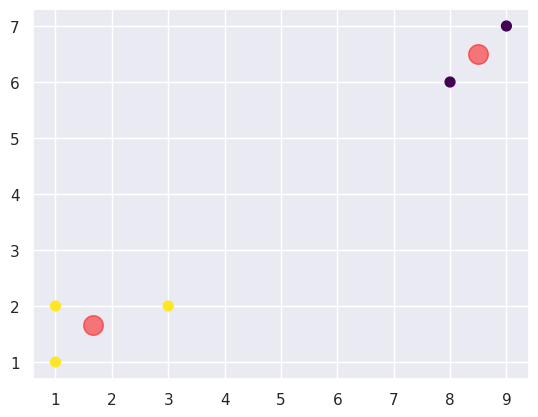

In [8]:
def find_clusters(X, n_clusters, rseed=23):

    # 1. Randomly choose centroids from existing data points
    # Not a best way.
    rng = np.random.RandomState(rseed)
    a = rng.permutation(X.shape[0])
    print("a=",a)
    i = a[:n_clusters]
    print("i=",i)
    centroids = X[i]
    print("centroids=",centroids)

    while True:
        # 2a. Assign labels based on closest centroids
        labels = pairwise_distances_argmin(X, centroids) #Compute minimum distances between one point and a set of points.
        print("labels = ",labels)

        # 2b. Find new centroids from means of points
        new_centroids = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        print("new_centroids = ",new_centroids)

        # 2c. Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, labels

centroids, labels = find_clusters(X, n_clusters=nc)
print("centroids = ", centroids)
print("labels = ", labels)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5);

# K-means Appplication (Color compression)

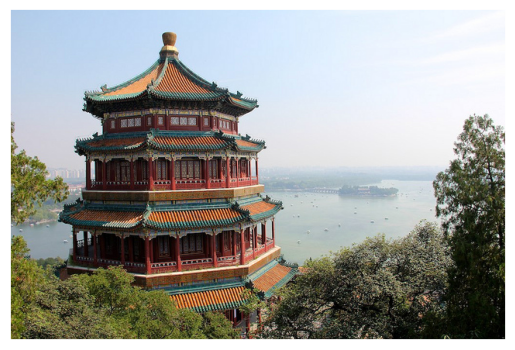

In [9]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [10]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [11]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    # Randomly permute a sequence, or return a permuted range.
    # If x is a multi-dimensional array, it is only shuffled along its first index.

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N] # obtain only N numbers
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

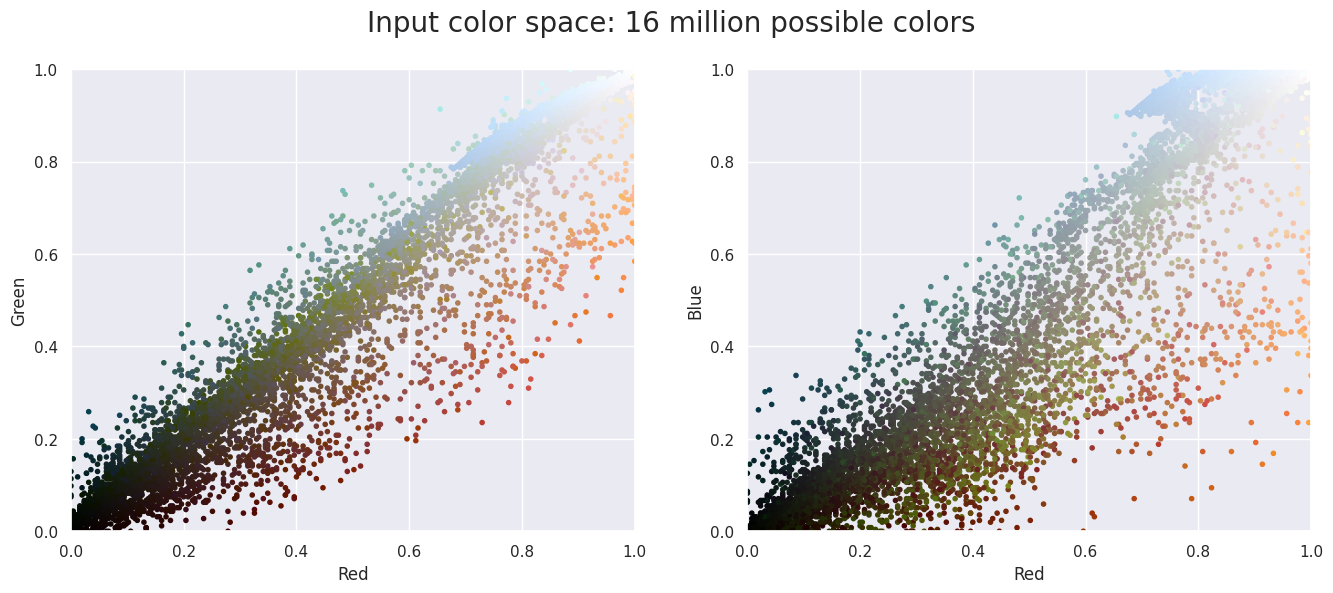

In [12]:
plot_pixels(data, title='Input color space: 16 million possible colors')

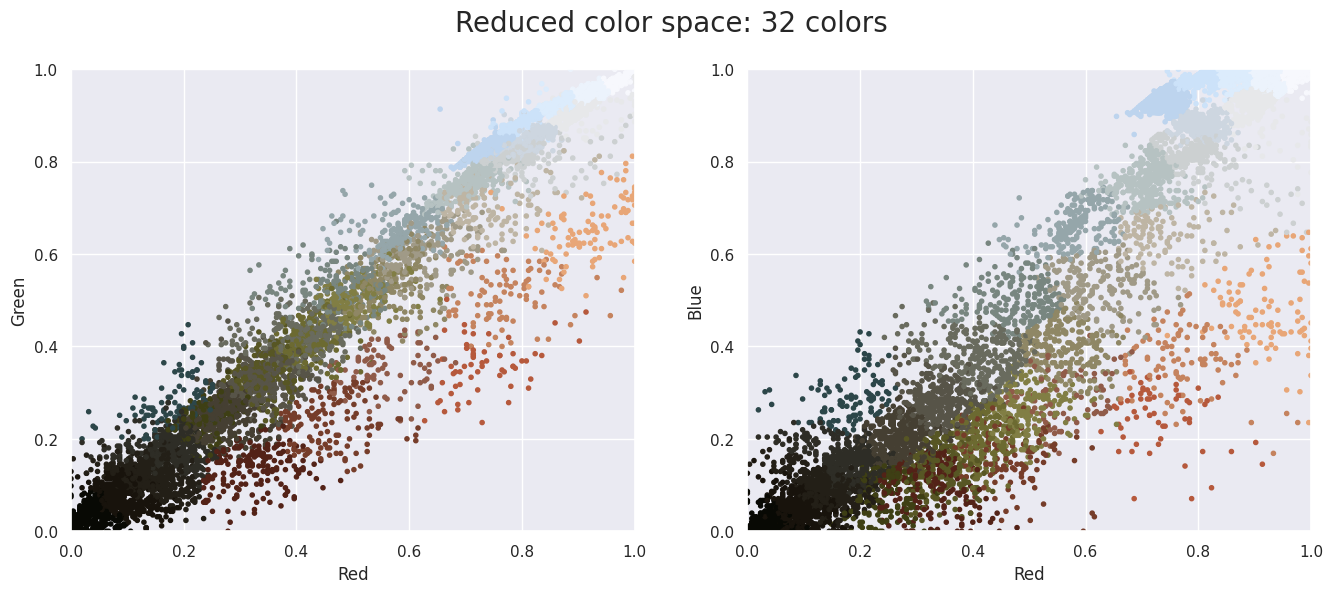

In [13]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
k = 32
mbkmeans = MiniBatchKMeans(k)
mbkmeans.fit(data)
#print(mbkmeans.cluster_centers_)
new_colors = mbkmeans.cluster_centers_[mbkmeans.predict(data)]
plot_pixels(data, colors=new_colors, title=f"Reduced color space: {k} colors")

#https://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf

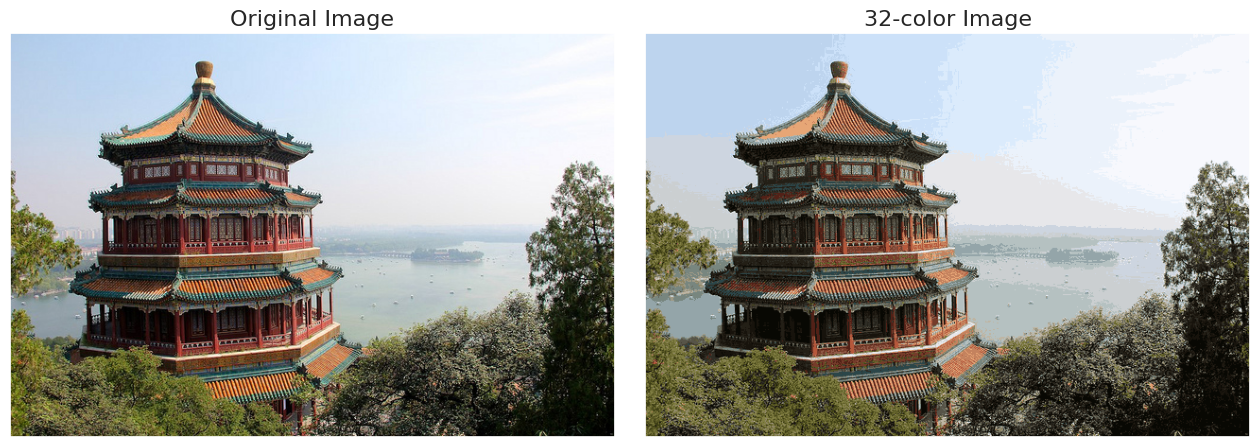

In [14]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title(f'{k}-color Image', size=16);

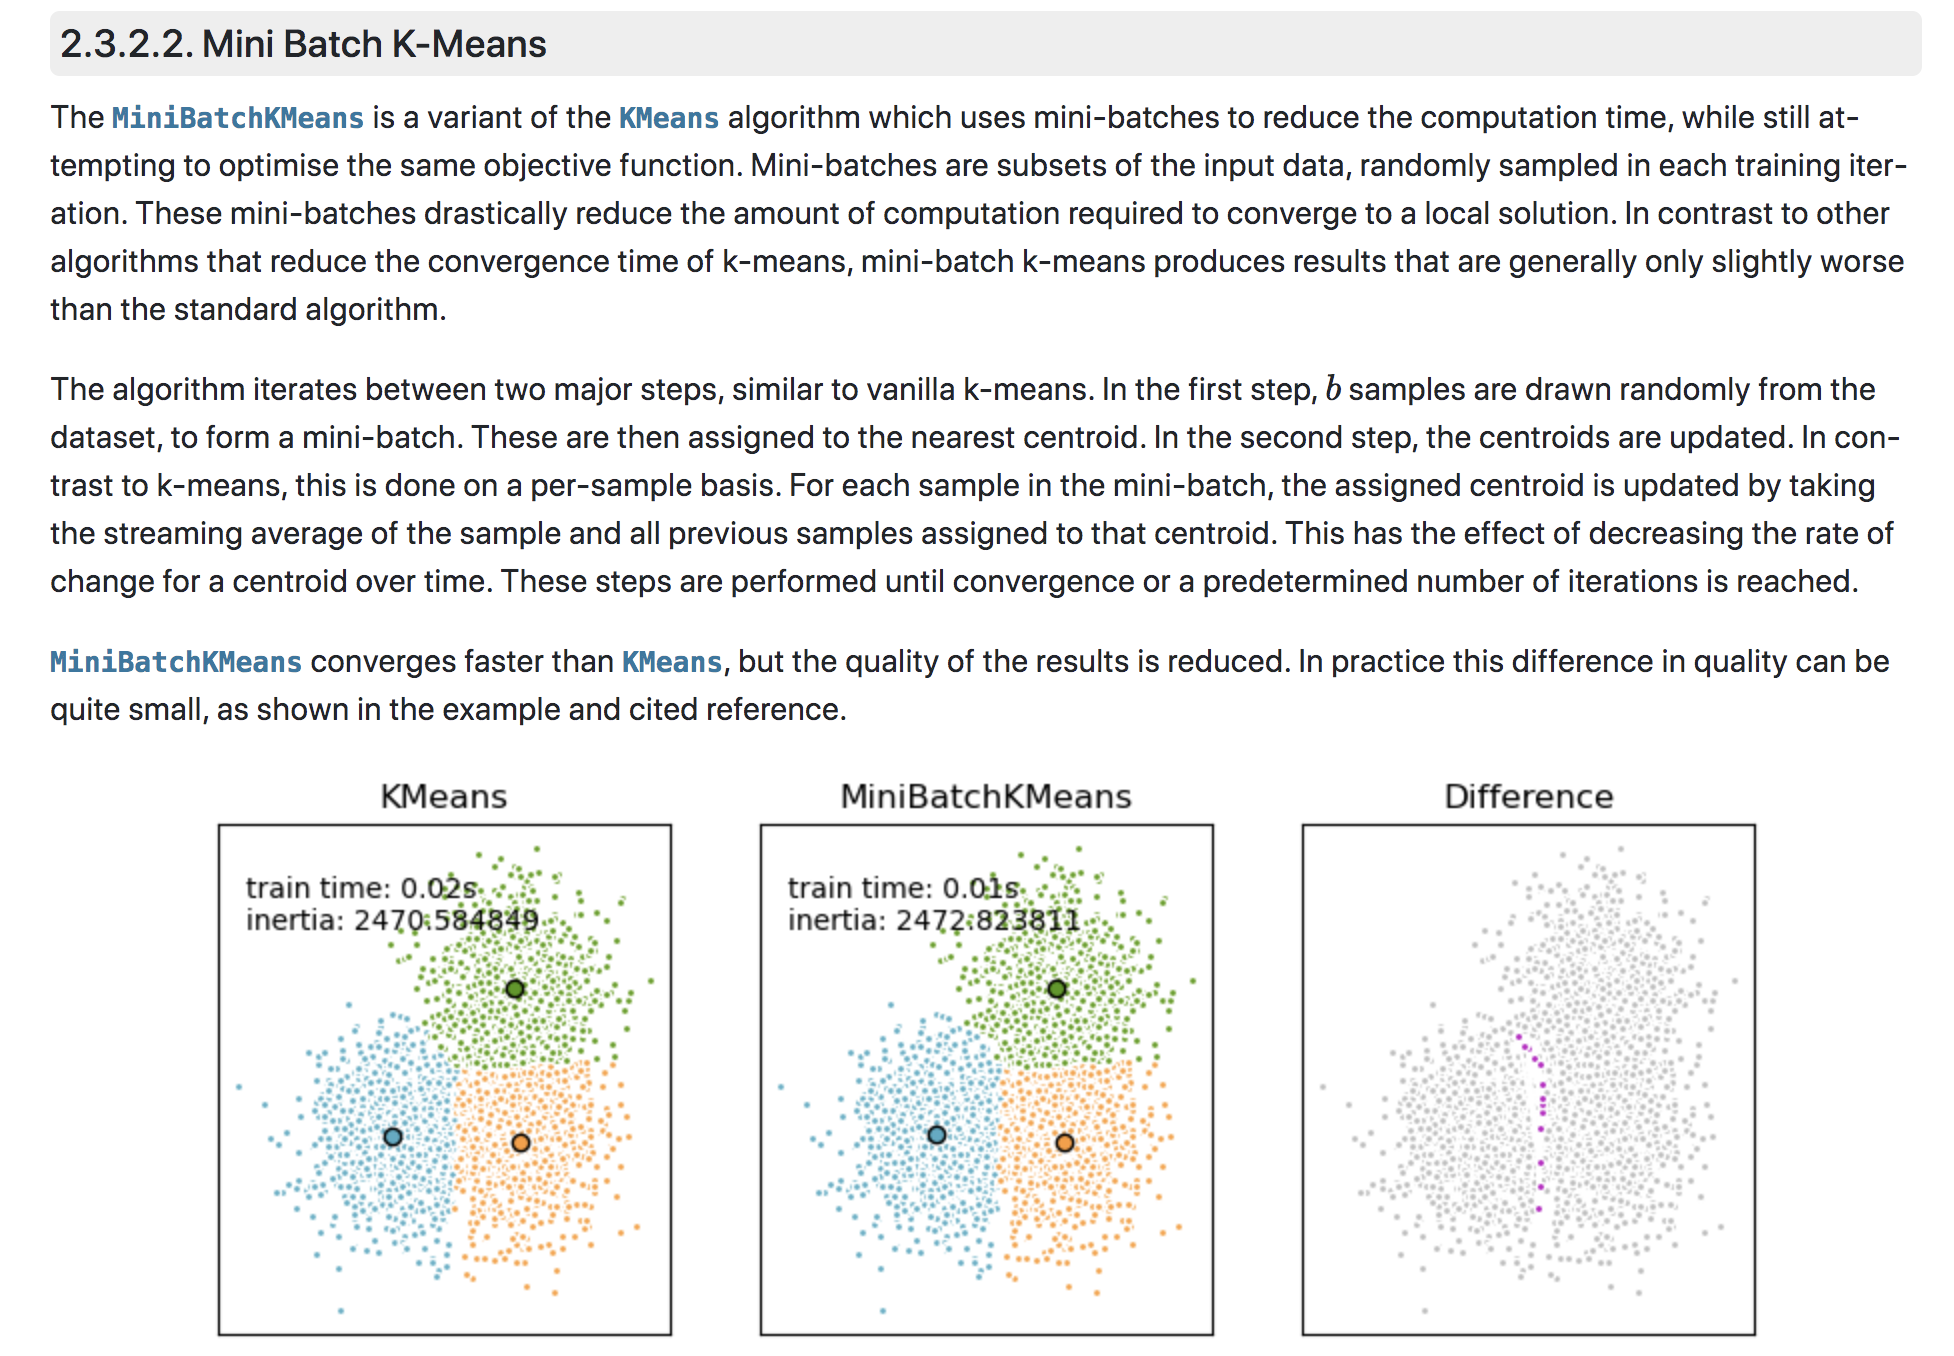

https://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf

In [15]:
!pip install kneed

In [16]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ibm-hr-analytics-attrition-dataset' dataset.
Path to dataset files: /kaggle/input/ibm-hr-analytics-attrition-dataset


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.decomposition import PCA
import numpy as np
#from tabulate import tabulate
pd.set_option('display.max_columns', None)    # Show all columns
pd.set_option('display.max_colwidth', 10)   # Show full text in each cell (no "...")
#pd.set_option('display.width', 1000)

# --- 1. Load the Dataset ---
try:
    df = pd.read_csv(path + "/WA_Fn-UseC_-HR-Employee-Attrition.csv")
    print(df.info())
    print(df.head())
    #print(tabulate(df.head(), headers='keys', tablefmt='psql', showindex=False))
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the path.")
    exit()

# --- 2. Data Cleaning ---

# Drop redundant/constant columns
df = df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1)

X = df.drop('Attrition', axis=1)
y = df['Attrition'] # Retain for analysis

# --- 3. Define Preprocessing Steps using Pipeline ---

# Define columns by type
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessor steps
# 1. Scaling for numerical features (crucial for K-Means distance)
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 2. One-Hot Encoding for nominal categorical features
# Exclude features that are ordinal (like Education, JobInvolvement) if possible.
nominal_categorical_features = ['Department', 'JobRole', 'MaritalStatus', 'BusinessTravel','Gender','OverTime','EducationField']
ordinal_categorical_features = [col for col in categorical_features if col not in nominal_categorical_features]
print("ordinal_categorical_features = ", ordinal_categorical_features)

categorical_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), nominal_categorical_features),
        ('ordinal', OrdinalEncoder(), ordinal_categorical_features)
    ],
    remainder='passthrough' # Keep other columns (none left here)
)

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# --- 4. K-Means Pipeline (Elbow Method) ---

# We only need the preprocessor and a placeholder for the clustering model
kmeans_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Transform the data once to run the Elbow Method
X_processed = kmeans_pipeline.fit_transform(X)

# Elbow Method
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_processed)
    wcss.append(kmeans.inertia_)

# Use KneeLocator to find the optimal K
kl = KneeLocator(k_range, wcss, curve='convex', direction='decreasing')
optimal_k = kl.elbow
K_FINAL = optimal_k if optimal_k is not None else 3

print(f"Optimal K suggested by Elbow Method: {K_FINAL}")

# --- 5. Final K-Means Pipeline Execution ---

# Add the K-Means estimator to the pipeline
kmeans_pipeline.steps.append(['kmeans', KMeans(n_clusters=K_FINAL, init='k-means++', max_iter=300, n_init=10, random_state=42)])
cluster_labels = kmeans_pipeline.fit_predict(X)

# Add cluster labels to the original dataframe for analysis
df['Cluster'] = cluster_labels

# --- 6. Cluster Profiling --

# A. Cluster Sizes
print("\n--- Cluster Sizes ---")
cluster_counts = df['Cluster'].value_counts().sort_index()
print(cluster_counts)

# B. Cluster Profiling (Mean Values for Original Features)
print("\n--- Mean Values by Cluster (High/Low values help characterize clusters) ---")
# Select a few key features for succinct profiling
profiling_features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'PerformanceRating']
cluster_profiles = df.groupby('Cluster')[profiling_features].mean()
print(cluster_profiles)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [18]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
# We calculate this on X_processed because K-Means operates on the scaled/encoded features
silhouette_avg = silhouette_score(X_processed, cluster_labels)

print(f"Silhouette Score for K={K_FINAL}: {silhouette_avg:.4f}")

Silhouette Score for K=4: 0.0795


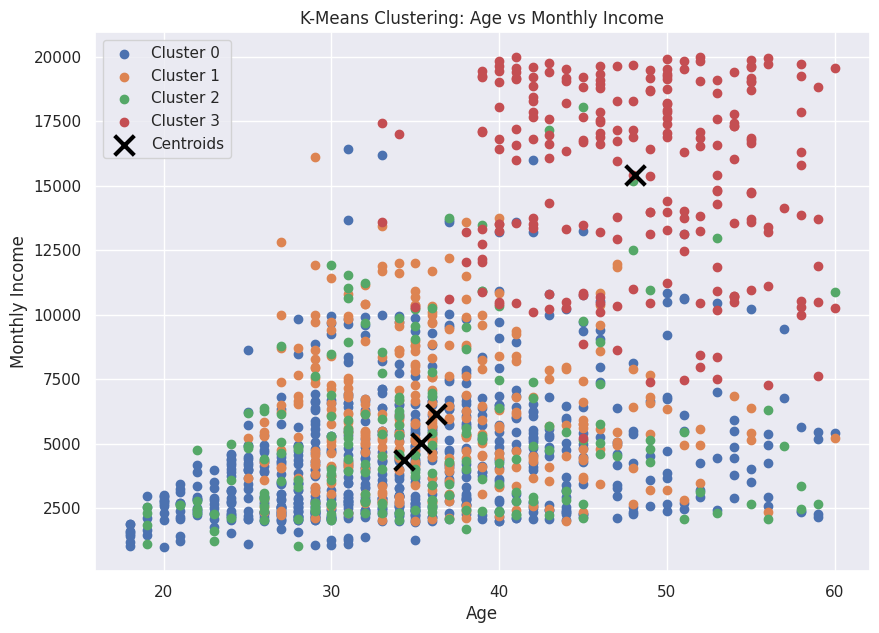

In [19]:
# Ensure Cluster labels are attached to the dataframe
if 'Cluster' not in df.columns:
    df['Cluster'] = cluster_labels

# Create a scatter plot using Age vs Monthly Income
plt.figure(figsize=(10, 7))

for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Age'], cluster_data['MonthlyIncome'],
                label=f'Cluster {cluster_id}')

# Plot centroids (calculated as the mean of the original features for each cluster)
centroids_raw = df.groupby('Cluster')[['Age', 'MonthlyIncome']].mean()
plt.scatter(centroids_raw['Age'], centroids_raw['MonthlyIncome'],
            marker='x', s=200, linewidths=3, color='black', label='Centroids')

plt.title('K-Means Clustering: Age vs Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
import plotly.express as px
import plotly.graph_objects as go

# Ensure Cluster labels are attached to the dataframe
if 'Cluster' not in df.columns:
    df['Cluster'] = cluster_labels

# Create the base scatter plot with Plotly Express
# Convert Cluster to string to ensure discrete colors
df['Cluster_Str'] = df['Cluster'].astype(str)

fig = px.scatter(df, x='Age', y='MonthlyIncome', color='Cluster_Str',
                 title='K-Means Clustering: Age vs Monthly Income',
                 labels={'Cluster_Str': 'Cluster'},
                 opacity=0.7)

# Calculate centroids based on original features
centroids_raw = df.groupby('Cluster')[['Age', 'MonthlyIncome']].mean().reset_index()

# Add centroids to the plot
fig.add_trace(
    go.Scatter(
        x=centroids_raw['Age'],
        y=centroids_raw['MonthlyIncome'],
        mode='markers',
        marker=dict(symbol='x', size=12, color='black', line=dict(width=2)),
        name='Centroids'
    )
)

fig.show()

## Apply K-means to cluster this data (What is the best K?)
https://github.com/ekaratnida/Applied-machine-learning/blob/master/Week14-kmeans/Mall_Customers.csv